In [1]:
#installing the current version of tensorflow
!pip install tensorflow

In [2]:
#import tensorflow and check the version
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.1


In [26]:
#import important libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
from tensorflow import keras
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D,Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.math import confusion_matrix 
import pickle
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
#load the dataset from pickled files
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("W.pickle","rb")
W = pickle.load(pickle_in)
W=np.asarray(W)

pickle_in = open("Y.pickle","rb")
y = pickle.load(pickle_in)
y = to_categorical(y)

In [28]:
#split into train and test datasets
X_train,X_test,W_train,W_test,y_train,y_test=train_test_split(X,W,y,train_size=0.8,test_size=0.2,random_state=123)
print(X_test.shape)
print(W_test.shape)
print(y_test.shape)

(1657, 64, 64, 1)
(1657,)
(1657, 5)


In [29]:
from tensorflow.keras.utils import plot_model
#from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import ModelCheckpoint

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 60, 60, 128)       3328      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 18, 18, 64)        73792     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 3, 3, 64)         

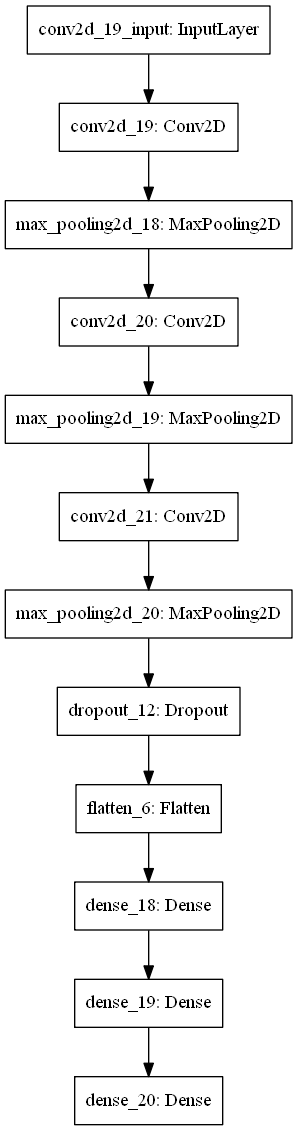

In [30]:
from tensorflow.keras.utils import plot_model
visible1 = (64,64,1)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()

plot_model(model, to_file='convolutional_neural_network.png')

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
             )

In [32]:
import time
start = time.perf_counter()
print(y_train.shape)

history=model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          validation_split=0.1,
          callbacks=None,class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6626, 5)
Epoch 1/20
94/94 [==============================] - 33s 351ms/step - loss: 1.4743 - accuracy: 0.6416 - val_loss: 0.5364 - val_accuracy: 0.7979
Epoch 2/20
94/94 [==============================] - 32s 345ms/step - loss: 0.4822 - accuracy: 0.8087 - val_loss: 0.4316 - val_accuracy: 0.8235
Epoch 3/20
94/94 [==============================] - 32s 342ms/step - loss: 0.3625 - accuracy: 0.8575 - val_loss: 0.3549 - val_accuracy: 0.8627
Epoch 4/20
94/94 [==============================] - 32s 344ms/step - loss: 0.3234 - accuracy: 0.8801 - val_loss: 0.2974 - val_accuracy: 0.8884
Epoch 5/20
94/94 [==============================] - 32s 343ms/step - loss: 0.2758 - accuracy: 0.9016 - val_loss: 0.2732 - val_accuracy: 0.9095
Epoch 6/20
94/94 [==============================] - 32s 345ms/step - loss: 0.2581 - accuracy: 0.9071 - val_loss: 0.2558 - val_accuracy: 0.9186
Epoch 7/20
94/94 [==============================] - 33s 348ms/step - loss: 0.2478 - accuracy: 0.9141 - val_loss: 0.2905 - val_accura

In [34]:
score = model.evaluate(X_train, y_train, verbose=1)

208/208 [==============================] - 7s 35ms/step - loss: 0.0637 - accuracy: 0.9817


In [35]:
print(score)

[0.06366006284952164, 0.9817386269569397]


In [36]:
score = model.evaluate(X_test, y_test, verbose=1)

52/52 [==============================] - 2s 33ms/step - loss: 0.2681 - accuracy: 0.9288


In [37]:
print(score)

[0.2680870294570923, 0.9287869930267334]


In [38]:
import tensorflow.math as tfm
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api.model")
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api_no_rotation.model")


#print(model.summary)
#y_pred=model.predict_classes(X_test)
print(model.predict(X_test))
print(model.predict((X_test))[1][1])
y_pred=np.argmax(model.predict((X_test)), axis=-1)


#
classes=[0,1,2,3,4]
#classes=[0,1,2,3,4]
a=np.zeros(len(y_test)).astype(int)
#b=np.zeros(len(y_train)).astype(int)
#print(a)
#print(len(y_test))
for i in range(0,len(y_test)):
    a[i]=np.where(y_test[i]==1)[0][0]
print(a)
#for j in range(0,len(y_train)):
#    b[i]=np.where(y_train[j]==1)[0][0]

#print(b)
con_mat = tfm.confusion_matrix(labels=a, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

#con_mat_1 = tfm.confusion_matrix(labels=b, predictions=y_pred).numpy()
#con_mat_norm_1 = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
#con_mat_df_1 = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

[[1.1843979e-08 1.3262231e-11 3.8127152e-07 9.9999964e-01 1.8225753e-10]
 [1.2240355e-06 2.1965913e-07 2.0973487e-06 5.2401914e-13 9.9999642e-01]
 [4.6502851e-07 1.0625135e-06 1.2185369e-06 4.2987081e-14 9.9999726e-01]
 ...
 [9.2767721e-07 3.5531530e-10 2.7025079e-03 9.9729627e-01 1.9952428e-07]
 [8.0699660e-09 6.3913423e-11 3.6038792e-08 1.0000000e+00 5.0126459e-10]
 [2.4202768e-07 9.7866717e-04 9.0624063e-08 6.6926699e-16 9.9902105e-01]]
2.1965913e-07
[3 4 4 ... 3 3 4]


PermissionError: [Errno 13] Permission denied: 'E:/Meat_Excels'

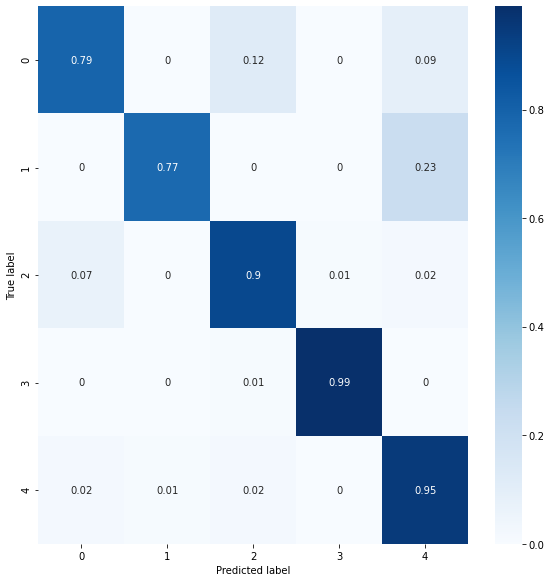

[0.2680870294570923, 0.9287869930267334]


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
score = model.evaluate((X_test), y_test, verbose=0)
#score = model.evaluate((X_test), y_test, verbose=0)
print(score)

In [24]:
from tensorflow.keras.models import load_model
model.save('MeatCut.h5')

In [25]:
model.save_weights('MeatCut_weights.h5')

In [27]:
model=load_model('MeatCut.h5')

Classes = ["20001","20002","20003","20004","20010"]

20001
1500280492.jpg


In [47]:
import tensorflow.math as tfm
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api.model")
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api_no_rotation.model")


#print(model.summary)
y_pred=model.predict_classes(X_test)
#print(model.predict((X_test,W_test)))
#print(model.predict((X_test,W_test))[1][1])
#y_pred=np.argmax(model.predict((X_test,W_test)), axis=-1)


#
classes=[0,1,2,3,4]
#classes=[0,1,2,3,4]
a=np.zeros(len(y_test)).astype(int)
#print(a)
#print(len(y_test))
for i in range(0,len(y_test)):
  a[i]=np.where(y_test[i]==1)[0][0]
print(a)
#con_mat = tfm.confusion_matrix(labels=a, predictions=y_pred).numpy()
#con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
#con_mat_df = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

b=np.zeros(len(y_train)).astype(int)
#print(b)
#print(len(y_test))
for i in range(0,len(y_train)):
  b[i]=np.where(y_train[i]==1)[0][0]
print(b)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[3 4 4 ... 3 3 4]
[4 3 4 ... 0 0 4]


In [48]:
print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [50]:
import pandas as pd
pd.Series(a)

0       3
1       4
2       4
3       4
4       3
       ..
1652    4
1653    4
1654    3
1655    3
1656    4
Length: 1657, dtype: int32

In [51]:
pd.Series(b)

0       4
1       3
2       4
3       2
4       2
       ..
6621    4
6622    1
6623    0
6624    0
6625    4
Length: 6626, dtype: int32

In [52]:
pd.Series(b)

0       4
1       3
2       4
3       2
4       2
       ..
6621    4
6622    1
6623    0
6624    0
6625    4
Length: 6626, dtype: int32

In [53]:
import numpy
final = numpy.append(b,a)
final

array([4, 3, 4, ..., 3, 3, 4])

In [54]:
len(final)

8283

In [55]:
df = pd.read_csv('E:/Meat_Excels/NameandLabels.csv')

In [56]:
df['predicted_classes'] = final

In [57]:
df.to_csv('E:/Meat_Excels/meat_labels_predicted.csv')